In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 60)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2005-2006
VITAEC_D = pd.read_sas('/content/VITAEC_D.xpt')
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2017-2018
VITAEC_J = pd.read_sas('/content/VITAEC_J.xpt')

# read NHANES data: Lumbar Spine Bone Mineral Density (grams/cm^2) from Dual-Energy X-ray Absorptiometry - Whole Body (DXX_J) - 2017-2018 Examination
DXX_J = pd.read_sas('/content/DXX_J.xpt')
# read NHANES data: Lumbar Spine Bone Mineral Density (grams/cm^2) from Dual-Energy X-ray Absorptiometry - Whole Body (DXX_D) - 2005-2006 Examination
DXX_D = pd.read_sas('/content/dxx_d.xpt')

# # read NHANES data: Dual Energy X-ray Absorptiometry - Spine 2005-2006
# DXXSPN_D = pd.read_sas('/content/DXXSPN_D.xpt')

# # read NHANES data: Dual Energy X-ray Absorptiometry - Spine 2017-2018
# DXXSPN_J = pd.read_sas('/content/DXXSPN_J.xpt')

# # read NHANES data: Demographic features 2005-2006
DEMO_D = pd.read_sas('/content/DEMO_D.xpt')
# read NHANES data: Demographic features for 2017-2018
DEMO_J = pd.read_sas('/content/DEMO_J.xpt')


<ipython-input-3-861b54ccfbd2>:7: UserWarning: xport file may be corrupted.
  DXX_J = pd.read_sas('/content/DXX_J.xpt')
<ipython-input-3-861b54ccfbd2>:9: UserWarning: xport file may be corrupted.
  DXX_D = pd.read_sas('/content/dxx_d.xpt')
<ipython-input-3-861b54ccfbd2>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DXX_D = pd.read_sas('/content/dxx_d.xpt')
<ipython-input-3-861b54ccfbd2>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DXX_D = pd.read_sas('/content/dxx_d.xpt')
<ipython-input-3-861b54ccfbd2>:9: PerformanceWarni

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# alpha- and gamma-tocopherol LBXVIE and LBDGTCSI from VITAEC_D, DXXSPN_D
# lumbar spine BMD - DXXLSBMD from DXX_J and DXX_D
# race/ethnicity, gender, age, PIR (poverty income ratio), body mass index (BMI), serum phosphorus, and serum calcium

## Extract alpha-tocopherol and gamma-tocopherol and SEQN, remove duplicates
# t1 = VITAEC_J[['LBDVIESI','LBDGTCSI','SEQN']]
# t2 = VITAEC_D[['LBDGTCSI','SEQN']]
# t2['LBDVIESI'] = VITAEC_D[['LBXVIE']]*0.02322
# VE = pd.concat([t1, t2]).drop_duplicates()

t1 = VITAEC_J[['LBXVIE','LBDGTCSI','SEQN']]
t2 = VITAEC_D[['LBXVIE','LBDGTCSI','SEQN']]
VE = pd.concat([t1, t2]).drop_duplicates()
VE['LBXVIE'] = VE[['LBXVIE']]*0.02322

## Extract BMD and SEQN, remove duplicates
df_1 = DXX_D[['DXXLSBMD','SEQN']]
df_2 = DXX_J[['DXXLSBMD','SEQN']]
BMD = pd.concat([df_1,df_2]).drop_duplicates()

## Extract demographic data

print("---------merge ve and bmd data------------")

df_joined = pd.merge(VE, BMD, on = 'SEQN')
# remove na values
df_joined.dropna(inplace=True)
print(df_joined.head)
print(df_joined.shape)

---------merge ve and bmd data------------
<bound method NDFrame.head of         LBXVIE  LBDGTCSI     SEQN  DXXLSBMD
0     16.76484     5.356  93706.0     0.898
1     22.75560     3.987  93707.0     0.857
2     31.11480     3.675  93711.0     1.075
3     23.91660     2.786  93712.0     0.944
5     23.45220     4.588  93717.0     0.996
...        ...       ...      ...       ...
5278  11.07594     8.047  32223.0     0.939
5279  20.22462     5.477  32225.0     1.115
5280  28.32840     1.105  32226.0     1.075
5281  17.90262     3.915  32228.0     0.896
5282  16.62552     4.276  32229.0     1.255

[3779 rows x 4 columns]>
(3779, 4)


In [ ]:
DEMO_J.columns
df = pd.DataFrame()
df['Gender'] = DEMO_J['RIAGENDR']-1
df['Race'] = DEMO_J['RIDRETH3'].astype('category')
df['SEQN'] = DEMO_J['SEQN'].astype('category')
df['PIR'] = DEMO_J['INDFMPIR']
df['Age'] = DEMO_J['RIDAGEYR']

# Merge dataset
df_joined_demo = pd.merge(df, df_joined, on = 'SEQN')

# impute na value to mean
df_joined_demo['PIR'] = df_joined_demo['PIR'].fillna(df_joined_demo['PIR'].median())
df_joined_demo

,Gender,Race,SEQN,PIR,Age,LBXVIE,LBDGTCSI,DXXLSBMD
0,0.0,6.0,93706.0,1.965,18.0,16.76484,5.356,0.898
1,0.0,7.0,93707.0,1.880,13.0,22.75560,3.987,0.857
2,0.0,6.0,93711.0,5.000,56.0,31.11480,3.675,1.075
3,0.0,1.0,93712.0,0.760,18.0,23.91660,2.786,0.944
4,0.0,3.0,93717.0,1.490,22.0,23.45220,4.588,0.996
...,...,...,...,...,...,...,...,...
2898,1.0,3.0,101308.0,4.810,25.0,17.43822,4.516,1.184
2899,0.0,3.0,101310.0,3.560,17.0,17.34534,3.771,1.025
2900,0.0,3.0,101315.0,5.000,15.0,20.82834,3.315,0.927
2901,0.0,6.0,101316.0,3.660,22.0,15.74316,2.594,1.437


In [ ]:
# print("LBDVIESI - Serum vitamin E (alpha-tocopherol)(µmol/L)")
# print(df_joined['LBDVIESI'].describe(),"\n")

# print("LBDGTCSI -  Serum gamma-tocopherol(µmol/L)")
# print(df_joined['LBDGTCSI'].describe())

# print("DXXOSBMD - Total spine BMD")
# print(df_joined['DXXOSBMD'].describe())

# print("LBXVIE -  Serum gamma-tocopherol(µmol/L)")
# print(df_joined['LBXVIE'].describe())


LBDVIESI - Serum vitamin E (alpha-tocopherol)(µmol/L)
count    12297.000000
mean      1031.107912
std        408.574797
min        312.000000
25%        762.000000
50%        935.000000
75%       1180.000000
max       5910.000000
Name: LBXVIE, dtype: float64 

LBDGTCSI -  Serum gamma-tocopherol(µmol/L)
count    12297.000000
mean         5.013806
std          2.604458
min          0.521000
25%          3.267000
50%          4.564000
75%          6.149000
max         45.878000
Name: LBDGTCSI, dtype: float64
DXXOSBMD - Total spine BMD


KeyError: ignored

In [ ]:
# median_alpha = df_joined['LBDVIESI'].median()
# df_joined['LBDVIESI'] = df_joined['LBDVIESI'].fillna(median_alpha)
# median_gamma = df_joined['LBDGTCSI'].median()
# df_joined['LBDGTCSI'] = df_joined['LBDGTCSI'].fillna(median_gamma)
# median_BMD = df_joined['DXXOSBMD'].median()
# df_joined['DXXOSBMD'] = df_joined['DXXOSBMD'].fillna(median_BMD)

(6541, 76)

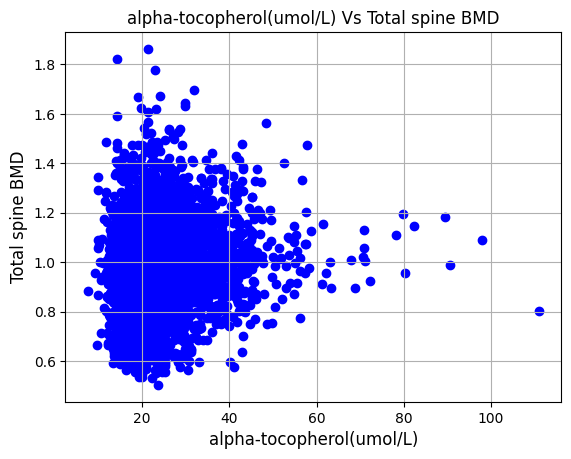

      Gender Race    PIR   Age    LBXVIE  LBDGTCSI
0        0.0  6.0  1.965  18.0  16.76484     5.356
1        0.0  7.0  1.880  13.0  22.75560     3.987
2        0.0  6.0  5.000  56.0  31.11480     3.675
3        0.0  1.0  0.760  18.0  23.91660     2.786
4        0.0  3.0  1.490  22.0  23.45220     4.588
...      ...  ...    ...   ...       ...       ...
2898     1.0  3.0  4.810  25.0  17.43822     4.516
2899     0.0  3.0  3.560  17.0  17.34534     3.771
2900     0.0  3.0  5.000  15.0  20.82834     3.315
2901     0.0  6.0  3.660  22.0  15.74316     2.594
2902     1.0  4.0  2.310  12.0  16.60230     4.155

[2903 rows x 6 columns]
Intercept: 
 0.8679253289225286
Coefficients: 
 [ 0.01128998  0.00535246  0.00046077  0.00481825 -0.00190972 -0.00176991]
                            OLS Regression Results                            
Dep. Variable:               DXXLSBMD   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Meth

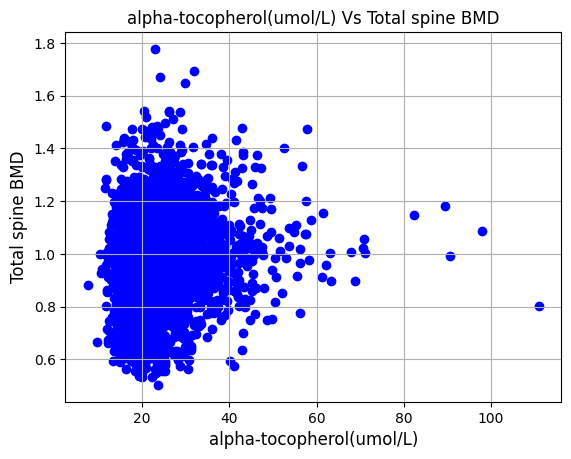

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

#df_joined_demo.drop(columns="SEQN", inplace=True)
x = df_joined_demo.iloc[:,:-1]

print(x)
y = df_joined_demo['DXXLSBMD']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)



plt.scatter(df_joined_demo['LBXVIE'], df_joined_demo['DXXLSBMD'], color='blue')
plt.title('alpha-tocopherol(umol/L) Vs Total spine BMD', fontsize=12)
plt.xlabel('alpha-tocopherol(umol/L)', fontsize=12)
plt.ylabel('Total spine BMD', fontsize=12)
plt.grid(True)
plt.show()

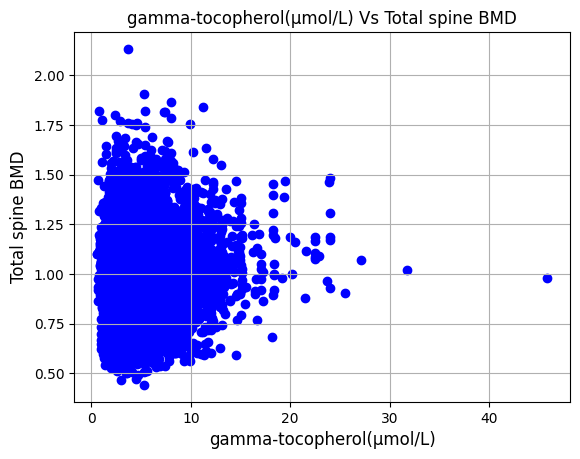

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_joined['LBDGTCSI'], df_joined['DXXLSBMD'], color='blue')
plt.title('gamma-tocopherol(µmol/L) Vs Total spine BMD', fontsize=12)
plt.xlabel('gamma-tocopherol(µmol/L)', fontsize=12)
plt.ylabel('Total spine BMD', fontsize=12)
plt.grid(True)
plt.show()

Intercept: 
 0.9441816377679385
Coefficients: 
 [0.00489619]
                            OLS Regression Results                            
Dep. Variable:               DXXOSBMD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     40.20
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.42e-10
Time:                        20:54:53   Log-Likelihood:                 2744.4
No. Observations:                7720   AIC:                            -5485.
Df Residuals:                    7718   BIC:                            -5471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
d1 = pd.read_sas('/content/sample_data/DR1IFF_D.XPT')
d2 = pd.read_sas('/content/sample_data/DR1TOT_D.XPT')
d3 = pd.read_sas('/content/sample_data/DEMO_D.XPT')


<ipython-input-24-4487f5055dc3>:1: UserWarning: xport file may be corrupted.
  d1 = pd.read_sas('/content/sample_data/DR1IFF_D.XPT')
<ipython-input-24-4487f5055dc3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d2 = pd.read_sas('/content/sample_data/DR1TOT_D.XPT')
<ipython-input-24-4487f5055dc3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d2 = pd.read_sas('/content/sample_data/DR1TOT_D.XPT')
<ipython-input-24-4487f5055dc3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [ ]:
df = d1.join(d2, on = 'SEQN',how='left', lsuffix='_left', rsuffix='_right')
print(d1.shape, d2.shape, df.shape)
df.head()

(22089, 83) (9950, 160) (22089, 243)


,SEQN_left,DR1ILINE,WTDRD1_left,WTDR2D_left,DR1DRSTZ_left,DR1EXMER_left,DRABF_left,DRDINT_left,DR1DAY_left,DR1LANG_left,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,31127.0,1.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31127.0,2.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31127.0,3.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31127.0,4.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31127.0,5.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#DR1IATOC - Vitamin E as alpha-tocopherol (mg)
print('DR1IATOC - Vitamin E as alpha-tocopherol (mg)')
print('--------------------------------------------------')
print(df['DR1IATOC'].describe())

#DR1IATOA - Added alpha-tocopherol (Vitamin E) (mg)
print('DR1IATOA - Added alpha-tocopherol (Vitamin E) (mg)')
print('--------------------------------------------------')
print(df['DR1IATOA'].describe())


DR1IATOC - Vitamin E as alpha-tocopherol (mg)
--------------------------------------------------
count    2.189900e+04
mean     3.981433e-01
std      8.999795e-01
min      5.397605e-79
25%      1.000000e-02
50%      1.000000e-01
75%      3.900000e-01
max      2.759000e+01
Name: DR1IATOC, dtype: float64
DR1IATOA - Added alpha-tocopherol (Vitamin E) (mg)
--------------------------------------------------
count    2.189900e+04
mean     3.569158e-02
std      4.091837e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      5.397605e-79
max      1.873000e+01
Name: DR1IATOA, dtype: float64


In [ ]:
#combine with demographic info
df_with_demo = pd.merge(pd.merge(d1,d2,on='SEQN'),d3,on='SEQN')

In [ ]:
import matplotlib as plt
#gender info
print('RIAGENDR - Gender')
print(df_with_demo['RIAGENDR'].value_counts())

#racial breakdown
print('RIDRETH1 - Race/Ethnicity - Recode')
print(df_with_demo['RIDRETH1'].value_counts())

RIAGENDR - Gender
2.0    11539
1.0    10550
Name: RIAGENDR, dtype: int64
RIDRETH1 - Race/Ethnicity - Recode
3.0    8844
1.0    6093
4.0    5255
5.0    1165
2.0     732
Name: RIDRETH1, dtype: int64


(22089, 243)